# **Proyek Sistem Rekomendasi : Rekomendasi Lagu menggunakan Content-Based Recommendation**

- Nama: Jessindy Tanuwijaya
- Email: tanjess676@gmail.com
- ID Dicoding: jessdytan

## 1. Import Library/Packages

In [ ]:
!pip install tensorflow_recommenders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 8.4 MB/s eta 0:00:00


In [ ]:
# Sistem & File Handling
import os                         # Operasi sistem file & direktori
import shutil                     # Menyalin dan memindahkan file
import zipfile                    # Menangani file ZIP (ekstraksi, kompresi)
import io                         # Operasi I/O berbasis memori
from pathlib import Path          # Representasi path file & direktori modern

# Operasi Numerik & Data
import math                       # Fungsi matematika dasar
import numpy as np                # Operasi array, vektor, dan matriks
import pandas as pd               # Manipulasi dan analisis data tabular

# Visualisasi Data
import matplotlib.pyplot as plt   # Visualisasi dasar (plot, histogram, dll.)
import seaborn as sns             # Visualisasi statistik (heatmap, boxplot, dll.)

# Preprocessing
from sklearn.preprocessing import LabelEncoder  # Mengubah label kategorik jadi numerik
from sklearn.preprocessing import StandardScaler  # Standarisasi fitur (mean=0, std=1)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_recommenders as tfrs


# Model Machine Learning
from sklearn.linear_model import LogisticRegression         # Model klasifikasi linier
from sklearn.neighbors import KNeighborsClassifier          # Algoritma K-NN
from sklearn.ensemble import RandomForestClassifier         # Random Forest (model ensambel)

# Evaluasi Model
from sklearn.metrics import (confusion_matrix,              # Matriks kebingungan
                             precision_score,               # Skor presisi
                             recall_score,                  # Skor recall
                             f1_score,                      # Skor F1
                             accuracy_score,                # Skor akurasi
                             classification_report)         # Laporan klasifikasi lengkap

# Split Data & Optimasi Model
from sklearn.model_selection import train_test_split        # Membagi data latih & uji
from sklearn.model_selection import cross_val_score         # Validasi silang
from sklearn.model_selection import KFold                   # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV            # Pencarian grid hyperparameter
from sklearn.model_selection import RandomizedSearchCV      # Pencarian acak hyperparameter

# Scikit-learn Shortcut
import sklearn as sk                # Shortcut opsional untuk cek versi atau struktur

from sklearn.preprocessing import MinMaxScaler

## 2. Data Wrangling

### 2.1 Download and Extract Dataset From Kaggle

Langkah-langkah untuk Mendapatkan kaggle.json:
1. Login ke Kaggle:
  
  Pergi ke Kaggle dan login menggunakan akun kamu. Jika belum punya akun, Anda bisa mendaftar terlebih dahulu.

2. Buka Halaman Akun Anda:
  
  Setelah login, klik ikon profil di sudut kanan atas halaman, kemudian pilih "**My Account**" dari dropdown menu.

3. Scroll ke Bagian API:
  
  Di halaman "Account", scroll ke bawah sampai menemukan bagian yang bernama "API". Di bagian ini ada tombol "**Create New API Token**". Klik tombol tersebut untuk membuat token API baru.

4. Download kaggle.json:

  Setelah klik tombol "Create New API Token", file kaggle.json akan otomatis diunduh ke komputer Anda.File ini berisi dua informasi penting: username dan key, yang akan digunakan untuk mengakses Kaggle API.





In [ ]:
from google.colab import files, userdata
# upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jessdy","key":"dbb400ce801632d77354c79aac787f97"}'}

Kode di bawah bertujuan untuk menyiapkan kredensial API Kaggle dengan cara memindahkan file kaggle.json ke folder yang tepat di Google Colab, sehingga API Kaggle dapat digunakan untuk mengakses dataset atau model secara otomatis dan aman.

In [ ]:
# Buat folder .kaggle di home directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan kaggle.json ke folder tersebut
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Ubah permission supaya hanya bisa dibaca oleh user
os.chmod('/root/.kaggle/kaggle.json', 600)

Setelah menjalankan perintah dibawah ini, file zip dataset akan diunduh ke direktori kerja saat ini di Google Colab. Anda dapat mengekstrak dan menggunakannya untuk proyek Anda.

In [ ]:
!kaggle datasets download -d meirnizri/cellphones-recommendations

Dataset URL: https://www.kaggle.com/datasets/meirnizri/cellphones-recommendations
License(s): ODbL-1.0
  0% 0.00/5.23k [00:00<?, ?B/s]
100% 5.23k/5.23k [00:00<00:00, 22.1MB/s]


Mengekstrak seluruh isi file zip ke dalam folder dataset. Folder ini akan dibuat secara otomatis jika belum ada.

In [ ]:
with zipfile.ZipFile("cellphones-recommendations.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

### 2.2 Assessing Data

#### Membaca dan mengimpor dataset ponsel.

In [ ]:
phone = pd.read_csv('/content/dataset/cellphones data.csv')
rating = pd.read_csv('/content/dataset/cellphones ratings.csv')
user = pd.read_csv('/content/dataset/cellphones users.csv')

df_merge = rating.merge(phone, on="cellphone_id", how="left").merge(user, on="user_id", how="left")

#### Menampilkan 5 data teratas

In [ ]:
phone.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [ ]:
rating.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [ ]:
user.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


#### Menampilkan informasi gambaran umum dataset

In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


#### Mengetahui jumlah baris dan kolom

In [ ]:
# Mengetahui berapa banyak baris dan kolom dalam dataframe phone
print("Banyak Baris dalam Cellphones Data:",phone.shape[0])
print("Banyak Kolom dalam Cellphones Data:", phone.shape[1])

# Mengetahui berapa banyak baris dan kolom dalam dataframe rating
print("\nBanyak Baris dalam Cellphones Ratings:",rating.shape[0])
print("Banyak Kolom dalam Cellphones Ratings:", rating.shape[1])

# Mengetahui berapa banyak baris dan kolom dalam dataframe user
print("\nBanyak Baris dalam Cellphones Users:",user.shape[0])
print("Banyak Kolom dalam Cellphones Users:", user.shape[1])

Banyak Baris dalam Cellphones Data: 33
Banyak Kolom dalam Cellphones Data: 14

Banyak Baris dalam Cellphones Ratings: 990
Banyak Kolom dalam Cellphones Ratings: 3

Banyak Baris dalam Cellphones Users: 99
Banyak Kolom dalam Cellphones Users: 4


#### Menampilkan data statistik dataset

In [ ]:
phone.describe()

,cellphone_id,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,16.00000,148.363636,6.787879,6.219091,41.333333,15.484848,4320.666667,6.433333,197.363636,628.272727
std,9.66954,92.197417,2.712904,2.885472,26.350601,10.028463,818.746590,0.476095,25.379394,433.873057
min,0.00000,32.000000,3.000000,1.020000,12.000000,4.000000,2018.000000,4.700000,141.000000,129.000000
25%,8.00000,128.000000,4.000000,3.800000,12.000000,8.000000,4000.000000,6.400000,183.000000,312.000000
50%,16.00000,128.000000,8.000000,6.880000,50.000000,12.000000,4500.000000,6.500000,201.000000,528.000000
75%,24.00000,128.000000,8.000000,7.940000,50.000000,16.000000,5000.000000,6.700000,207.000000,840.000000
max,32.00000,512.000000,12.000000,11.000000,108.000000,40.000000,5003.000000,7.600000,271.000000,1998.000000


In [ ]:
rating.describe()

,user_id,cellphone_id,rating
count,990.000000,990.000000,990.000000
mean,136.373737,16.421212,6.700000
std,80.664654,9.473466,2.639036
min,0.000000,0.000000,1.000000
25%,74.000000,8.000000,5.000000
50%,128.000000,16.000000,7.000000
75%,226.000000,25.000000,9.000000
max,258.000000,32.000000,18.000000


In [ ]:
user.describe()

,user_id,age
count,99.000000,99.000000
mean,136.373737,36.393939
std,81.034206,9.678314
min,0.000000,21.000000
25%,76.500000,29.500000
50%,128.000000,33.000000
75%,220.500000,42.000000
max,258.000000,61.000000


#### Mengecek duplikat dalam data

In [ ]:
phone.duplicated().sum()

np.int64(0)

In [ ]:
rating.duplicated().sum()

np.int64(0)

In [ ]:
user.duplicated().sum()

np.int64(0)

Kesimpulan: Tidak ada data yang duplikat

#### Mengecek data hilang

In [ ]:
phone.isnull().sum()

,0
cellphone_id,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0
selfie camera,0
battery size,0


In [ ]:
rating.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0


In [ ]:
user.isnull().sum()

,0
user_id,0
age,0
gender,0
occupation,1


Terdapat 1 baris data yang hilang pada kolom occupation

## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribusi Operation System

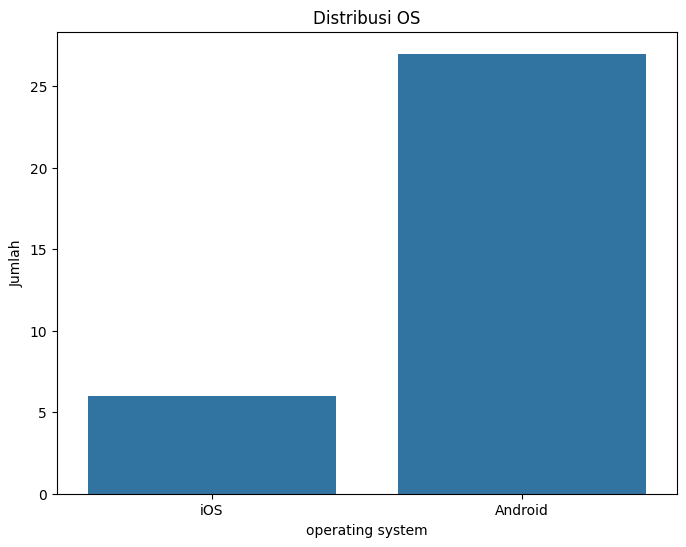

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=phone['operating system'], data=phone)
plt.title('Distribusi OS')
plt.ylabel('Jumlah')
plt.show()

### 3.2 Rating ponsel

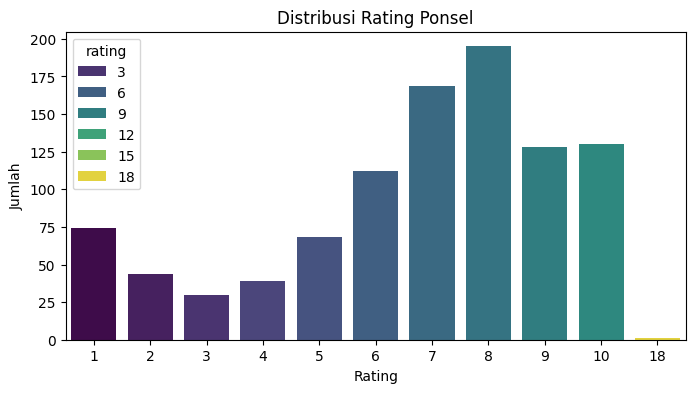

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='rating',hue='rating', data=df_merge, palette='viridis')
plt.title('Distribusi Rating Ponsel')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

Terdapat Outlier pada rating, dari skala 1-10, ada rating 18

### 3.3 Ponsel Popular

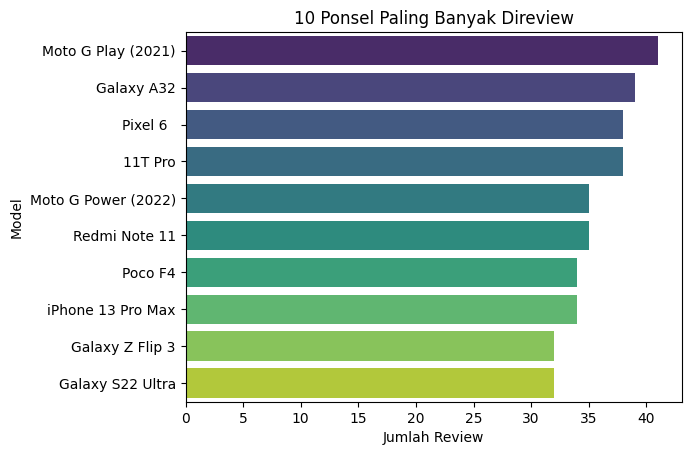

In [ ]:
top_phones = df_merge['model'].value_counts().head(10)
sns.barplot(x=top_phones.values, y=top_phones.index,hue=top_phones.index, palette='viridis')
plt.title('10 Ponsel Paling Banyak Direview')
plt.xlabel('Jumlah Review')
plt.ylabel('Model')
plt.show()

### 3.4 Distribusi Pekerjaan dan Rating

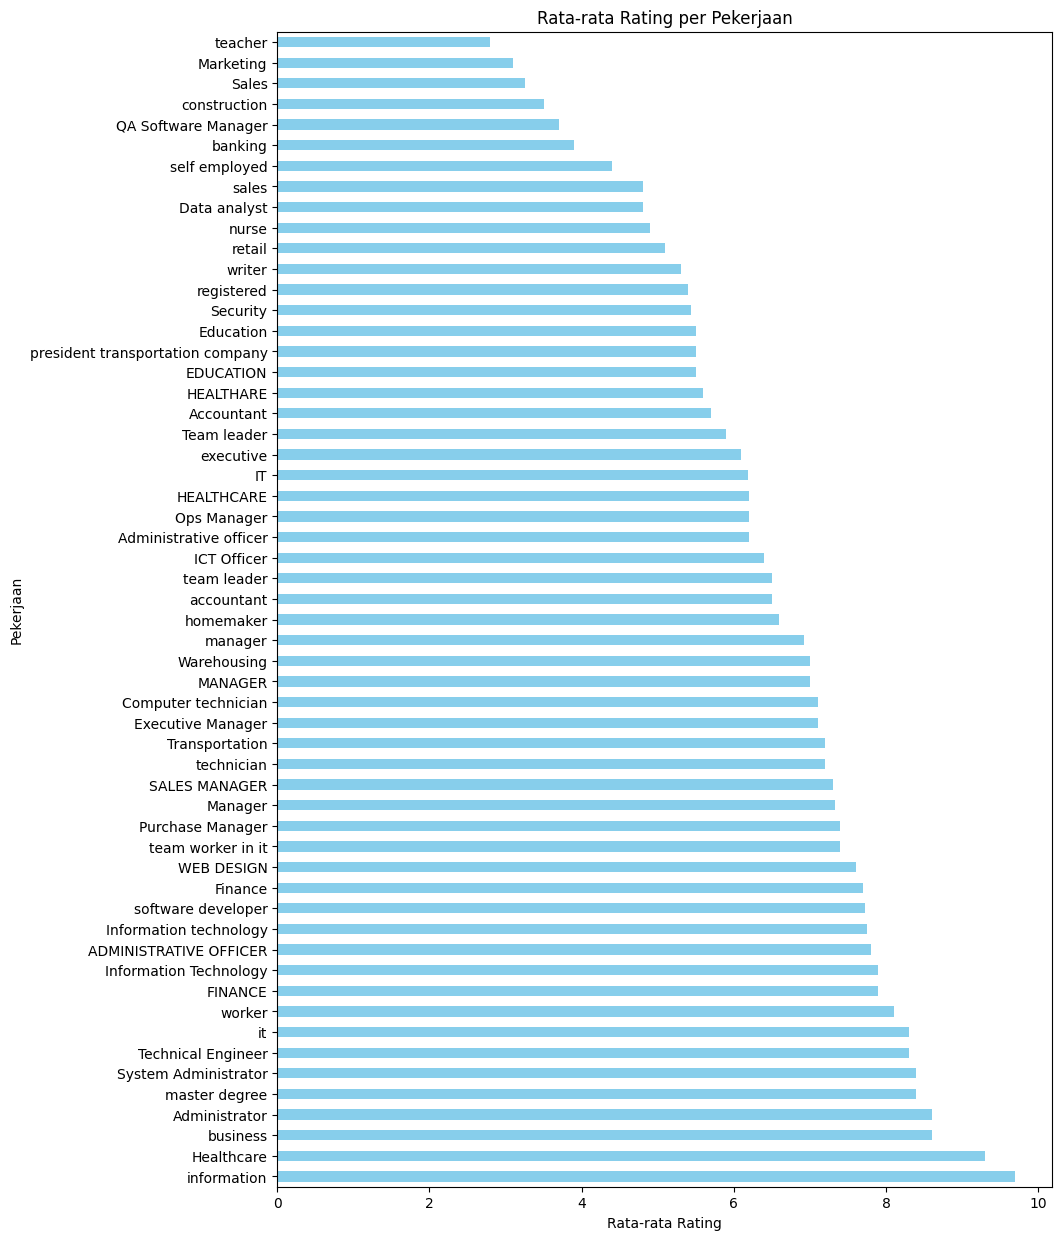

In [ ]:
occupation_rating = df_merge.groupby('occupation')['rating'].mean().sort_values(ascending=False)
occupation_rating.plot(kind='barh', figsize=(10, 15), color='skyblue')
plt.title('Rata-rata Rating per Pekerjaan')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Pekerjaan')
plt.show()

Masih banyak data yang tidak konsisten untuk pekerjaan, seperti IT, team worker in it,it, healthare dan healthcare, dan sebagainya.

## 4. Data Preprocessing

Mengecek data yang hilang

In [ ]:
print(df_merge.isnull().sum())

user_id              0
cellphone_id         0
rating               0
brand                0
model                0
operating system     0
internal memory      0
RAM                  0
performance          0
main camera          0
selfie camera        0
battery size         0
screen size          0
weight               0
price                0
release date         0
age                  0
gender               0
occupation          10
dtype: int64


Mendapatkan informasi dataframe

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           990 non-null    int64  
 1   cellphone_id      990 non-null    int64  
 2   rating            990 non-null    int64  
 3   brand             990 non-null    object 
 4   model             990 non-null    object 
 5   operating system  990 non-null    object 
 6   internal memory   990 non-null    int64  
 7   RAM               990 non-null    int64  
 8   performance       990 non-null    float64
 9   main camera       990 non-null    int64  
 10  selfie camera     990 non-null    int64  
 11  battery size      990 non-null    int64  
 12  screen size       990 non-null    float64
 13  weight            990 non-null    int64  
 14  price             990 non-null    int64  
 15  release date      990 non-null    object 
 16  age               990 non-null    int64  
 1

Ubah format release data menjadi datetime

In [ ]:
df_merge['release date'] = pd.to_datetime(df_merge['release date'], dayfirst=True, errors='coerce')

Drop kolom yang memiliki missing values

In [ ]:
df = df_merge.dropna(subset=['occupation'])

Ubah rating menjadi skala 1-10

In [ ]:
df_merge = df_merge[df_merge['rating'] != 18]

Menyamakan nama pekerjaan agar konsisten

In [ ]:
df_merge['occupation'] = df_merge['occupation'].str.lower()

#Mengubah value 'healthare' pada kolom "occupation" menjadi 'healthcare'
df_merge['occupation'] = df_merge['occupation'].replace('healthare', 'healthcare')

#Mengubah value 'it' pada kolom "occupation" menjadi 'information technology'
df_merge['occupation'] = df_merge['occupation'].replace('team worker in it', 'it')

<ipython-input-94-c0885a8d89e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['occupation'] = df_merge['occupation'].str.lower()
<ipython-input-94-c0885a8d89e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['occupation'] = df_merge['occupation'].replace('healthare', 'healthcare')
<ipython-input-94-c0885a8d89e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

## 5. Building Recommendation System Content-Based Filtering

Drop baris yang memiliki id ponsel duplikat

In [ ]:
df_clean = df_merge.drop_duplicates('cellphone_id')

Mengubah kolom-kolom yang dipilih sebagai fitur rekomendasi dari DataFrame df_clean menjadi list

In [ ]:
cellphone_id = df_clean['cellphone_id'].tolist()
brand = df_clean['brand'].tolist()
model = df_clean['model'].tolist()
operating_system = df_clean['operating system'].tolist()
memory = df_clean['internal memory'].tolist()
ram = df_clean['RAM'].tolist()

print(len(cellphone_id))
print(len(brand))
print(len(model))
print(len(operating_system))
print(len(memory))
print(len(ram))

33
33
33
33
33
33


 Membuat DataFrame baru bernama cellphone_new dari daftar (list) yang sebelumnya telah diekstrak dari df_clean.

In [ ]:
cellphone_new = pd.DataFrame({
    'id': cellphone_id,
    'brand': brand,
    'model': model,
    'os': operating_system,
    'memory': memory,
    'ram': ram
})
cellphone_new

,id,brand,model,os,memory,ram
0,30,Motorola,Moto G Play (2021),Android,32,3
1,5,Apple,iPhone XR,iOS,64,3
2,10,Samsung,Galaxy S22,Android,128,8
3,9,Samsung,Galaxy A53,Android,128,6
4,23,Vivo,X80 Pro,Android,256,8
5,8,Samsung,Galaxy A32,Android,64,4
6,22,Oppo,Find X5 Pro,Android,256,12
7,16,Google,Pixel 6a,Android,128,6
8,19,OnePlus,Nord 2T,Android,128,8
9,3,Apple,iPhone 13 Pro,iOS,256,6


Berikut adalah sample datanya:

In [ ]:
data = cellphone_new
data.sample(5)

,id,brand,model,os,memory,ram
0,30,Motorola,Moto G Play (2021),Android,32,3
23,0,Apple,iPhone SE (2022),iOS,128,4
29,12,Samsung,Galaxy S22 Ultra,Android,128,8
2,10,Samsung,Galaxy S22,Android,128,8
16,4,Apple,iPhone 13 Pro Max,iOS,256,6


Mengubah teks pada kolom brand menjadi representasi numerik menggunakan TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF adalah tools untuk mengubah kumpulan teks menjadi vektor angka berdasarkan frekuensi kata yang disesuaikan dengan seberapa umum kata tersebut di seluruh dokumen.

In [ ]:
# Inisialisasi TfidfVectorizer
tfid = TfidfVectorizer()

# Melakukan perhitungan idf pada data brand
tfid.fit(data['brand'])

# Mapping array dari fitur index integer ke fitur brand
tfid.get_feature_names_out()

array(['apple', 'asus', 'google', 'motorola', 'oneplus', 'oppo',
       'samsung', 'sony', 'vivo', 'xiaomi'], dtype=object)

In [ ]:
tfidf_matrix = tfid.fit_transform(data['brand'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(33, 10)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],


Menampilkan hasil acak dari matriks TF-IDF dalam bentuk tabel agar lebih mudah dibaca

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data.model
).sample(10, axis=1).sample(10, axis=0)

,google,sony,xiaomi,apple,vivo,oppo,motorola,oneplus,asus,samsung
model,,,,,,,,,,
Moto G Power (2022),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Xperia Pro,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Poco F4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moto G Pure,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Galaxy A13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11T Pro,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iPhone 13 Pro,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Moto G Stylus (2022),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


 Mengukur kemiripan antar teks dalam kolom brand berdasarkan representasi TF-IDF.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

Analisis kemiripan antar model handphone berdasarkan brand

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['model'], columns=data['model'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (33, 33)


model,10T,Nord 2T,Redmi Note 11,12 Pro,Pixel 6a
model,,,,,
Pixel 6a,0.0,0.0,0.0,0.0,1.0
Poco F4,0.0,0.0,1.0,1.0,0.0
Galaxy S22,0.0,0.0,0.0,0.0,0.0
iPhone SE (2022),0.0,0.0,0.0,0.0,0.0
Xperia Pro,0.0,0.0,0.0,0.0,0.0
iPhone 13 Mini,0.0,0.0,0.0,0.0,0.0
Find X5 Pro,0.0,0.0,0.0,0.0,0.0
X80 Pro,0.0,0.0,0.0,0.0,0.0
Pixel 6,0.0,0.0,0.0,0.0,1.0


Fungsi untuk memberikan rekomendasi model handphone yang mirip dengan model tertentu berdasarkan nilai cosine similarity.

In [ ]:
def model_recommendations(model, similarity_data=cosine_sim_df, items=data[['model','brand','os','memory','ram']], k=5):

    index = similarity_data.loc[:,model].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop model agar nama model yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(model, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Uji coba sistem rekomendasi

In [ ]:
model_recommendations('iPhone 13 Mini')

,model,brand,os,memory,ram
0,iPhone 13,Apple,iOS,128,4
1,iPhone SE (2022),Apple,iOS,128,4
2,iPhone XR,Apple,iOS,64,3
3,iPhone 13 Pro,Apple,iOS,256,6
4,iPhone 13 Pro Max,Apple,iOS,256,6


 ## 6. Building Recommendation System Collaborative Filtering

In [ ]:
df = rating
df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


In [ ]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [0, 1, 6, 8, 10, 12, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 52, 53, 56, 60, 74, 79, 80, 84, 85, 91, 95, 98, 99, 100, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 119, 120, 123, 124, 126, 128, 129, 137, 140, 142, 143, 144, 145, 148, 152, 154, 156, 160, 162, 164, 169, 178, 183, 194, 200, 203, 204, 208, 211, 215, 226, 227, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 256, 257, 258]
encoded user_id :  {0: 0, 1: 1, 6: 2, 8: 3, 10: 4, 12: 5, 16: 6, 24: 7, 25: 8, 26: 9, 27: 10, 28: 11, 29: 12, 30: 13, 32: 14, 33: 15, 35: 16, 36: 17, 37: 18, 38: 19, 52: 20, 53: 21, 56: 22, 60: 23, 74: 24, 79: 25, 80: 26, 84: 27, 85: 28, 91: 29, 95: 30, 98: 31, 99: 32, 100: 33, 104: 34, 105: 35, 106: 36, 110: 37, 111: 38, 112: 39, 113: 40, 114: 41, 115: 42, 116: 43, 119: 44, 120: 45, 123: 46, 124: 47, 126: 48, 128: 49, 129: 50, 137: 51, 140: 52, 142: 53, 143: 54, 144: 55, 145: 56, 148: 57, 152: 58, 154: 59, 156: 60, 160:

In [ ]:
# Mengubah cellphone_id menjadi list tanpa nilai yang sama
cellphone_ids = df['cellphone_id'].unique().tolist()

# Melakukan proses encoding cellphone_id
cellphone_to_cellphone_encoded = {x: i for i, x in enumerate(cellphone_ids)}

# Melakukan proses encoding angka ke cellphone_id
cellphone_encoded_to_cellphone = {i: x for i, x in enumerate(cellphone_ids)}

In [ ]:
# Mapping ke df
df['user'] = df['user_id'].map(user_encoded_to_user)
df['cellphone'] = df['cellphone_id'].map(cellphone_to_cellphone_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah cellphone
num_cellphones = len(cellphone_encoded_to_cellphone)
print(num_cellphones)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

99
33


In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan cellphone menjadi satu value
x = df[['user', 'cellphone']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[142.  16.]
 [ nan  19.]
 [ nan  16.]
 ...
 [ nan  30.]
 [ nan  17.]
 [ 84.   8.]] [0.47058824 0.47058824 0.41176471 0.23529412 0.47058824 0.35294118
 0.         0.47058824 0.29411765 0.35294118 0.52941176 0.11764706
 0.47058824 0.52941176 0.35294118 0.47058824 0.29411765 0.29411765
 0.41176471 0.41176471 0.23529412 0.05882353 0.35294118 0.29411765
 0.35294118 0.11764706 0.29411765 0.29411765 0.41176471 0.29411765
 0.05882353 0.41176471 0.41176471 0.47058824 0.23529412 0.29411765
 0.11764706 0.47058824 0.17647059 0.47058824 0.35294118 0.05882353
 0.29411765 0.41176471 0.41176471 0.29411765 0.47058824 0.47058824
 0.35294118 0.47058824 0.23529412 0.52941176 0.52941176 0.29411765
 0.29411765 0.35294118 0.29411765 0.35294118 0.23529412 0.47058824
 0.17647059 0.41176471 0.41176471 0.         0.17647059 0.41176471
 0.41176471 0.41176471 0.29411765 0.23529412 0.35294118 0.35294118
 0.23529412 0.35294118 0.52941176 0.35294118 0.52941176 0.47058824
 0.35294118 0.52941176 0.47058824 0.47058824 

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_cellphones, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_phone = num_cellphones
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.phone_embedding = layers.Embedding( # layer embeddings phone
        num_cellphones,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.phone_bias = layers.Embedding(num_cellphones, 1) # layer embedding phone bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    phone_vector = self.phone_embedding(inputs[:, 1]) # memanggil layer embedding 3
    phone_bias = self.phone_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_phone = tf.tensordot(user_vector, phone_vector, 2)

    x = dot_user_phone + user_bias + phone_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
# Buat model
model = RecommenderNet(num_users, num_cellphones, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.8105 - root_mean_squared_error: 0.3100 - val_loss: 0.6705 - val_root_mean_squared_error: 0.1913
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6728 - root_mean_squared_error: 0.2060 - val_loss: 0.6605 - val_root_mean_squared_error: 0.1793
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6610 - root_mean_squared_error: 0.1863 - val_loss: 0.6552 - val_root_mean_squared_error: 0.1722
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6586 - root_mean_squared_error: 0.1839 - val_loss: 0.6509 - val_root_mean_squared_error: 0.1664
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6378 - root_mean_squared_error: 0.1706 - val_loss: 0.6531 - val_root_mean_squared_error: 0.1699
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6444 - root_mean_squared_error: 0.1652 - val_loss: 0.6520 - val_root_mean_squared_error: 0.1683
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss

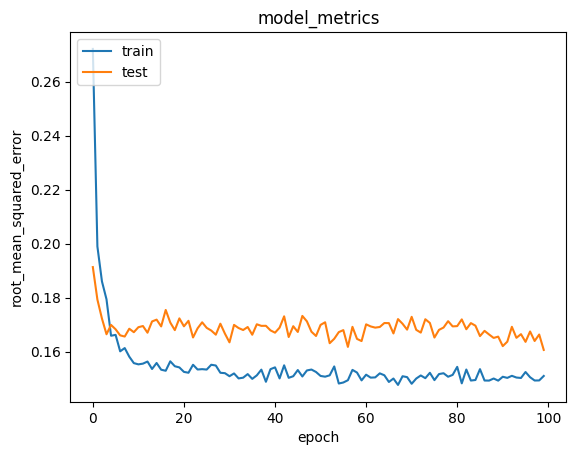

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cellphone_df = cellphone_new
df = pd.read_csv('/content/dataset/cellphones ratings.csv')

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
cellphone_reviewed_by_user = df[df.user_id == user_id]

cellphone_not_reviewed = cellphone_df[~cellphone_df['id'].isin(cellphone_reviewed_by_user.cellphone_id.values)]['id']
cellphone_not_reviewed = list(
    set(cellphone_not_reviewed)
    .intersection(set(cellphone_to_cellphone_encoded.keys()))
)

cellphone_not_reviewed = [[cellphone_to_cellphone_encoded.get(x)] for x in cellphone_not_reviewed]
user_encoder = user_to_user_encoded.get(user_id)
user_cellphone_array = np.hstack(
    ([[user_encoder]] * len(cellphone_not_reviewed), cellphone_not_reviewed)
)

In [ ]:
ratings = model.predict(user_cellphone_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_cellphone_ids = [
    cellphone_encoded_to_cellphone.get(cellphone_not_reviewed[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('cellphone with high ratings from user')
print('----' * 8)

top_cellphone_user = (
    cellphone_reviewed_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .cellphone_id.values
)

cellphone_df_rows = cellphone_df[cellphone_df['id'].isin(top_cellphone_user)]
for row in cellphone_df_rows.itertuples():
    print(row.brand, ':', row.model)

print('----' * 8)
print('Top 10 cellphone recommendation')
print('----' * 8)

recommended_cellphone = cellphone_df[cellphone_df['id'].isin(recommended_cellphone_ids)]
for row in recommended_cellphone.itertuples():
    print(row.brand, ':', row.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Showing recommendations for users: 234
cellphone with high ratings from user
--------------------------------
Apple : iPhone XR
Samsung : Galaxy S22
Samsung : Galaxy Z Flip 3
Apple : iPhone 13 Mini
Xiaomi : 11T Pro
--------------------------------
Top 10 cellphone recommendation
--------------------------------
Vivo : X80 Pro
Oppo : Find X5 Pro
OnePlus : Nord 2T
Apple : iPhone 13 Pro
Apple : iPhone 13 Pro Max
Apple : iPhone SE (2022)
Google : Pixel 6 Pro 
Samsung : Galaxy S22 Ultra
Xiaomi : 12 Pro
Apple : iPhone 13
